<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Xareny González,  Estefanía Meza, Alejandra Rico

**Fecha:** 14 de octubre del 2021.

**Expediente** : 720811, 729930, 720838.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [Link con el enlace del repositorio del creador del proyecto](https://github.com/Xarenyglp/ProyectoM1_GonzalezX_MezaE_RicoA)

# Proyecto TEMA 1

## 1.1 Causas de Enfermedades Cardiovasculares

<img src="cora.jpg">

## 1.2 Objetivos

### Objetivo General

> A lo largo del proyecto se pretendrá encontrar qué causas provocan que las personas sean más propensas a desarrollar una enfermedad cardiovascular. 

### Objetivos Específicos

> Simular la probabilidad de casos en donde las personas sufran de una enfermedad cariovascular considerando los siguientes datos:

>* **Age:** edad 
>* **Sex:** sexo 
>* **ChestPainType:** tipo de dolor de pecho (*TA:* angina típica, *ATA:* angina atípica, *NAP:* dolor no anginal, *ASY:* asintomático)
>* **Resting BP:** presión arterial en reposo (mm Hg)
>* **Cholesterol:** colesterol (mm/dl)
>* **Fasting BS:** azúcar en sangre en ayunas (1: si BS en ayunas> 120 mg/dl, 0: en caso contrario)
>* **Resting ECG:** resultados de electrocardiograma en reposo (*Normal:* Normal, *ST:* con anomalía de la onda ST-T, inversiones de la onda T y/o elevación o depresión del ST> 0.05 mV, *HVI:* muestra una hipertrofia ventricular izquierda probable o definitiva según los criterios de estes)
>* **MaxHR:** frecuencia cardíaca máxima alcanzada (Valor numérico entre 60 y 202)
>* **ExerciseAngina:** angina inducida por el ejercicio (Y: Sí, N: No)
>* **Oldpeak:** oldpeak = ST (Valor numérico medido en depresión)
> * **ST_Slope:** pendiente del segmento ST del ejercicio pico (*Up:* uploping, *Flat:* flat, *Down:* downsloping)
>* **HeartDisease:** clase de salida (1: enfermedad cardíaca, 0: normal)

Referencia: https://www.kaggle.com/fedesoriano/heart-failure-prediction

## 1.3 Definición del problema

> Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial, cobrando un estimado de 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada 5 muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por las ECV y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca.

> Las personas con enfermedad cardiovascular o que se encuentran en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoces donde un modelo de aprendizaje automático puede ser de gran ayuda.

Referencia: https://www.paho.org/es/temas/enfermedades-cardiovasculares

## 1.4 Nodos y variables que se decidieron simular y porqué

> Para el análisis de esta base de datos nos enfocaremos en las siguientes variables, las cuales consideramos son las más significativas y marcan una diferencia más generalizada en la población:
* **Age:** edad
* **Sex:** sexo
* **Cholesterol:** colesterol
* **Resting BP:** Presión alta en reposo
* **MaxHR:** frecuencia cardiaca máxima


<img src="diagramaflujo.jpg">

## 1.5 Definición de hipótesis y supuestos

### Hipótesis

* El sexo más propenso a desarrollar una enfermedad cardíaca es el masculino.
* El rango de edad para desarrollar una enfermedad cardíaca es entre los 55-70 años de edad.
* Se puede saber con un rango de certeza si se desarrollará la enfermedad.

### Supuestos

* Los datos estan distribuidos de forma normal. 
* La probabilidad de desarrollar alguna enfermadad influye directamente con todos los síntomas planteados.


## 1.6 Obtención de la base de datos

In [1]:
# Packages for data analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import scipy.stats as st
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
ecv = pd.read_csv('heart.csv').dropna()

nodos = ['Age','Cholesterol', 'RestingBP', 'MaxHR']
ecv

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
for n in nodos:
    q1, q3= np.percentile(ecv[n],[25,75])
    iqr = q3 - q1
    minimo = q1 -(1.5 * iqr) 
    maximo = q3 +(1.5 * iqr)
    ecv = ecv[(ecv[n]>=minimo) & (ecv[n]<=maximo)]

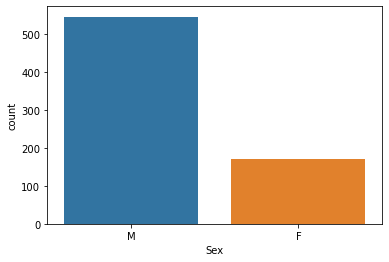

In [4]:
sns.countplot(data=ecv, x="Sex");

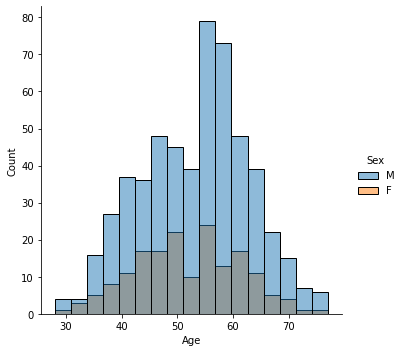

In [5]:
sns.displot(ecv, x="Age", hue="Sex");

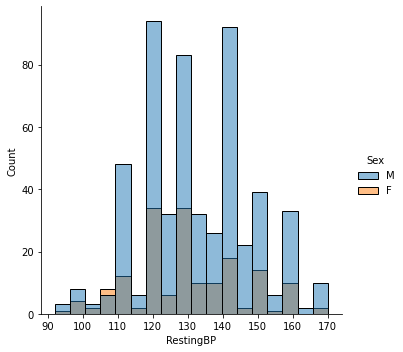

In [6]:
sns.displot(ecv, x="RestingBP", hue="Sex");

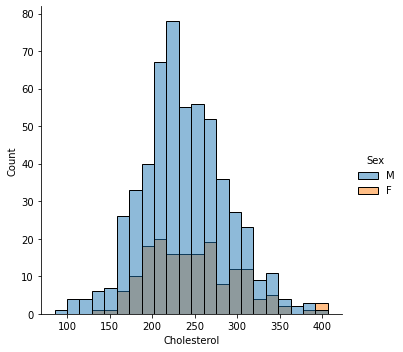

In [7]:
sns.displot(ecv, x='Cholesterol', hue="Sex");

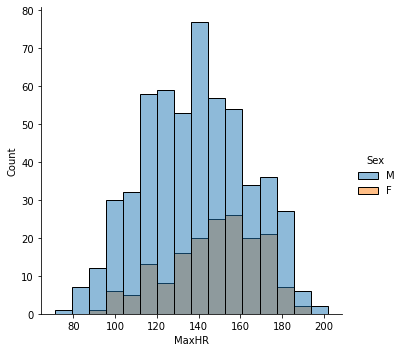

In [8]:
sns.displot(ecv, x='MaxHR', hue='Sex');

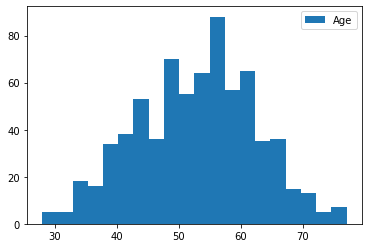

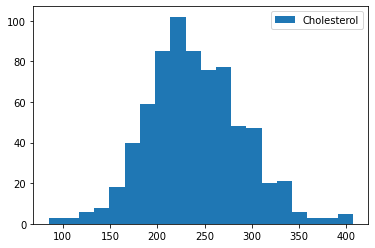

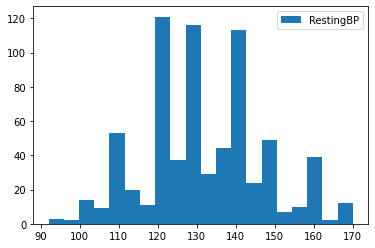

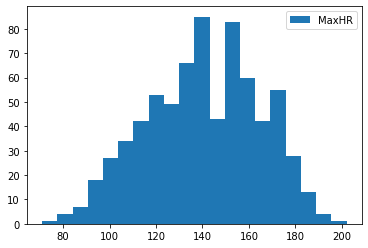

In [9]:
for i in range(4):
    plt.hist(ecv[nodos[i]],bins=20,label=nodos[i])
    plt.legend()
    plt.show()